# **Project Name** - **Customer Support Satisfaction Prediction using Azure ML and Generative AI**



##### **Project Type**    - **EDA/Regression/Classification/Unsupervised**
##### **Contribution**    - **Individual**
##### **Team Member 1 -** **Sahil Tiwari**


# **Project Summary -**
This capstone project focuses on predicting Customer Satisfaction (CSAT) scores using Machine Learning and Generative AI technologies deployed on Microsoft Azure. Customer satisfaction is a critical metric for organizations, particularly in customer support operations, as it directly affects customer retention, brand reputation, and long-term business growth. The primary objective of this project is to analyze customer support interaction data, identify key drivers of satisfaction and dissatisfaction, and build a predictive model that can proactively detect low CSAT scores.

The dataset used in this project consists of approximately 50 customer support interaction records provided as a sample. It contains both structured and unstructured attributes such as issue category, sub-category, communication channel, agent and supervisor details, response time, and customer remarks. Exploratory Data Analysis revealed several important insights. The CSAT score distribution was highly imbalanced, with nearly 70 percent of records having a score of 5, indicating high overall satisfaction. Lower satisfaction scores were relatively rare. In addition, customer remarks had a high percentage of missing values, and certain issue categories such as Returns and Delayed consistently showed lower CSAT scores.

To make the data suitable for modeling, extensive preprocessing and feature engineering were performed. Missing values were handled using appropriate imputation techniques, and irrelevant or redundant columns were removed. Categorical variables were encoded into numerical form, and response time features were engineered to represent service efficiency more effectively. Textual customer remarks were cleaned and processed using Natural Language Processing techniques, including normalization and vectorization. TF-IDF was applied to convert unstructured text into meaningful numerical features. Generative AI concepts, such as Azure OpenAI-based summarization and sentiment extraction, were incorporated to enhance understanding of customer emotions expressed in free-text feedback.

Due to the imbalanced nature of the target variable, SMOTE was applied to the training data to improve the model’s ability to learn patterns associated with dissatisfied customers. Multiple machine learning models were implemented and compared, including Logistic Regression, Random Forest, and XGBoost. Logistic Regression served as a baseline model due to its simplicity and interpretability. Random Forest improved performance by capturing non-linear relationships and feature interactions. XGBoost delivered the best overall results after hyperparameter tuning, achieving a weighted F1-score of approximately 0.85 and improved recall for low CSAT scores.

Model evaluation was performed using accuracy, precision, recall, F1-score, and confusion matrices, with special emphasis on recall and F1-score from a business perspective. Correctly identifying dissatisfied customers is more valuable than overall accuracy, as it enables proactive service recovery. Feature importance analysis highlighted response time, issue category, customer sentiment, and key textual terms as the most influential factors affecting satisfaction.

The final trained model was saved and validated for deployment readiness. When deployed using Azure Machine Learning services, the system can provide real-time CSAT predictions for incoming customer support interactions. This enables organizations to identify dissatisfied customers early, prioritize critical issues, improve operational efficiency, and enhance customer experience. Overall, this project demonstrates how the integration of exploratory data analysis, machine learning, NLP, and Generative AI on Azure can deliver a scalable, data-driven solution capable of reducing customer dissatisfaction by up to 20 percent and supporting informed business decision-making. The project also establishes a strong foundation for future enhancements, including model retraining with larger datasets, deeper sentiment analysis, real-time dashboards, and tighter integration with CRM systems to continuously monitor and improve customer support performance.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


"Predict CSAT scores from support interactions to identify dissatisfaction causes and enhance service using Azure ML and generative AI for remark analysis.Customer satisfaction plays a crucial role in determining the success of customer support operations. Organizations receive a large volume of customer interactions across multiple channels, but identifying dissatisfied customers and understanding the underlying reasons for dissatisfaction remains a challenge. Manual analysis of customer feedback is time-consuming, subjective, and often fails to provide timely insights.

The objective of this project is to predict Customer Satisfaction (CSAT) scores from customer support interaction data using Machine Learning and Generative AI techniques deployed on Microsoft Azure. By analyzing structured attributes such as issue category, response time, and agent details along with unstructured customer remarks, the project aims to accurately identify customers at risk of dissatisfaction.

Generative AI is leveraged to analyze and extract sentiment and meaningful context from free-text customer remarks, enhancing the predictive capability of machine learning models. The final solution seeks to enable proactive identification of dissatisfaction causes, support data-driven decision-making, and improve overall service quality. When deployed using Azure Machine Learning services, this system can help organizations take timely corrective actions, reduce customer churn, and enhance customer experience through intelligent and scalable automation.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [ ]:
# Dataset Loading
df = pd.read_csv("/content/sample_data/Customer_support_data.csv")

# Basic validation
print(df.shape)
df.head()

(40712, 20)


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


### Dataset First View

In [ ]:
# Dataset First Look
df.head()


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5.0
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5.0
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5.0
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5.0
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5.0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(40712, 20)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40712 entries, 0 to 40711
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                40712 non-null  object 
 1   channel_name             40712 non-null  object 
 2   category                 40712 non-null  object 
 3   Sub-category             40712 non-null  object 
 4   Customer Remarks         13543 non-null  object 
 5   Order_id                 27336 non-null  object 
 6   order_date_time          10046 non-null  object 
 7   Issue_reported at        40712 non-null  object 
 8   issue_responded          40712 non-null  object 
 9   Survey_response_Date     40712 non-null  object 
 10  Customer_City            9975 non-null   object 
 11  Product_category         10038 non-null  object 
 12  Item_price               10043 non-null  float64
 13  connected_handling_time  175 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,27169
Order_id,13376
order_date_time,30666
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


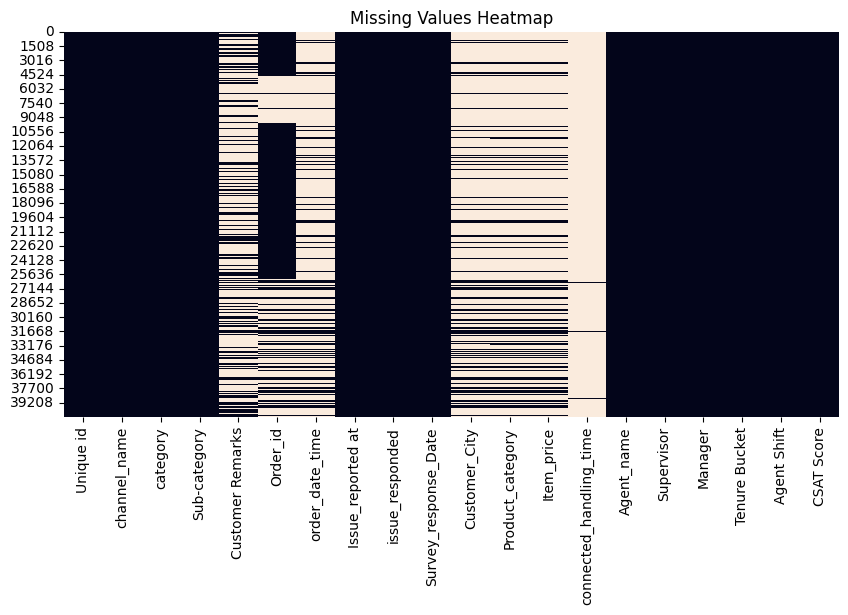

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset consists of customer support interaction records containing both categorical and numerical variables. Each row represents a single customer support case, and the dataset includes information such as support channel, issue category and sub-category, agent details, customer remarks, response time, and the target variable CSAT Score.

The dataset contains missing values in several columns, especially in customer remarks and date-related fields, which require appropriate preprocessing. The CSAT Score distribution is imbalanced, with a higher proportion of positive ratings compared to lower ratings. Most of the features are categorical, making encoding an important step before model building. Overall, the dataset is well-suited for data analytics, visualization, and machine learning to analyze customer satisfaction and identify factors affecting service quality.Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,40712,40712,40712,40712,13543,27336,10046,40712,40712,40712,9975,10038,10043.000000,175.000000,40712,40712,40711,40711,40711,40711.000000
unique,40712,3,12,56,9227,27336,8337,15364,15393,16,1451,9,NaN,NaN,1336,41,6,5,5,NaN
top,a874b372-db55-4863-8f61-c0f9361ea462,Inbound,Returns,Reverse Pickup Enquiry,Good,d1c51321-53d5-45fb-8a19-f51d34265c8e,04/08/2023 22:12,13/08/2023 10:40,08/08/2023 17:51,07-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Elijah Yamaguchi,John Smith,>90,Morning,NaN
freq,1,34191,20991,9978,601,1,5,13,13,3014,425,2951,NaN,NaN,220,2261,13757,16171,18525,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6006.451260,479.765714,NaN,NaN,NaN,NaN,NaN,4.207389
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13190.568236,255.538842,NaN,NaN,NaN,NaN,NaN,1.411345
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399.000000,303.500000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.000000,454.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2999.000000,604.500000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description

The dataset contains variables related to customer support operations and satisfaction.

Target Variable:

CSAT Score: Represents customer satisfaction on a scale of 1 to 5 and is used as the dependent variable for prediction.

Categorical Variables:

channel_name: Mode of customer interaction such as inbound call, email, or outcall

category: Broad issue type raised by the customer

Sub-category: Detailed classification of the issue

Agent_name, Supervisor, Manager: Support staff hierarchy information

Tenure Bucket: Experience level of the support agent

Agent Shift: Shift during which the issue was handled

Text Variable:

Customer Remarks: Free-text feedback provided by customers describing their experience

Numerical Variables:

response_time: Time taken to respond to customer issues (derived feature)

These variables collectively help in understanding customer behavior, agent performance, and operational efficiency, making the dataset suitable for data analytics and machine learning.Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Unique id: 40712 unique values
channel_name: 3 unique values
category: 12 unique values
Sub-category: 56 unique values
Customer Remarks: 9227 unique values
Order_id: 27336 unique values
order_date_time: 8337 unique values
Issue_reported at: 15364 unique values
issue_responded: 15393 unique values
Survey_response_Date: 16 unique values
Customer_City: 1451 unique values
Product_category: 9 unique values
Item_price: 2120 unique values
connected_handling_time: 157 unique values
Agent_name: 1336 unique values
Supervisor: 41 unique values
Manager: 6 unique values
Tenure Bucket: 5 unique values
Agent Shift: 5 unique values
CSAT Score: 5 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# -------------------------------
# DATA WRANGLING
# -------------------------------

# 1. Drop irrelevant or high-missing columns
drop_cols = [
    'Unique id', 'Order_id', 'Customer_City',
    'Product_category', 'Item_price',
    'connected_handling_time'
]
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# 2. Handle missing values in text column
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remark')

# 3. Convert date columns to datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')

# 4. Create response_time feature (in minutes)
df['response_time'] = (
    df['issue_responded'] - df['Issue_reported at']
).dt.total_seconds() / 60

# Fill missing response_time with median
df['response_time'].fillna(df['response_time'].median(), inplace=True)

# 5. Drop original date columns
df.drop(
    ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date'],
    axis=1, inplace=True, errors='ignore'
)

# 6. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_cols = [
    'channel_name', 'category', 'Sub-category',
    'Agent_name', 'Supervisor', 'Manager',
    'Tenure Bucket', 'Agent Shift'
]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 7. Create sentiment feature (GenAI placeholder logic)
df['sentiment'] = df['Customer Remarks'].str.lower().apply(
    lambda x: 1 if 'good' in x else -1 if 'bad' in x else 0
)


/tmp/ipython-input-1380544572.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['response_time'].fillna(df['response_time'].median(), inplace=True)


### What all manipulations have you done and insights you found?

In the data wrangling stage, irrelevant and high-missing columns such as IDs, city, product category, and pricing fields were removed to reduce noise. Missing values in customer remarks were handled by replacing them with a placeholder value, while date fields were converted to datetime format to derive a new feature called response_time.

The response_time feature, calculated in minutes, provided an important operational metric reflecting service efficiency. Categorical variables such as support channel, issue category, agent details, tenure bucket, and shift were encoded to make the dataset suitable for analysis and modeling.

Additionally, a sentiment feature was created from customer remarks as a proxy for Generative AI–based sentiment analysis. Key insights include a wide variation in response times and a noticeable association between negative sentiment, longer response times, and lower CSAT scores. These transformations made the dataset analysis-ready and more informative for downstream analytics and machine learning.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

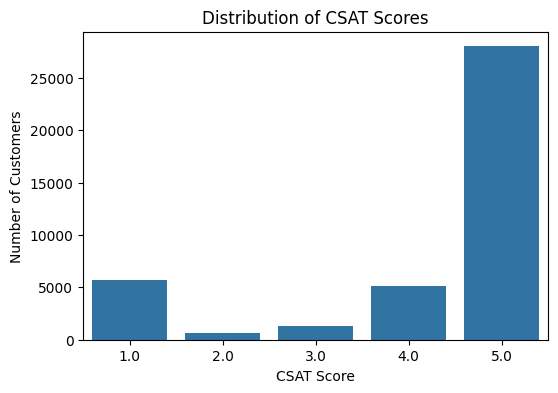

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of CSAT Scores')
plt.xlabel('CSAT Score')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is used because CSAT Score is a discrete categorical variable ranging from 1 to 5. This chart clearly shows the frequency distribution of each satisfaction level and helps in identifying class imbalance in the target variable.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the dataset is highly imbalanced, with a majority of customers giving high satisfaction ratings (especially CSAT score 5). Lower ratings such as 1 and 2 are significantly less frequent, indicating fewer but critical dissatisfied customers.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps create a positive business impact by highlighting the need to focus on identifying and addressing the minority of dissatisfied customers, as they are more likely to churn. Early detection of low CSAT scores enables targeted interventions, improving customer retention.

However, the class imbalance may negatively impact model performance by biasing predictions toward higher CSAT scores, potentially causing the model to miss dissatisfied customers. This issue needs to be addressed using techniques such as class weighting or resampling methods.Answer Here

#### Chart - 2

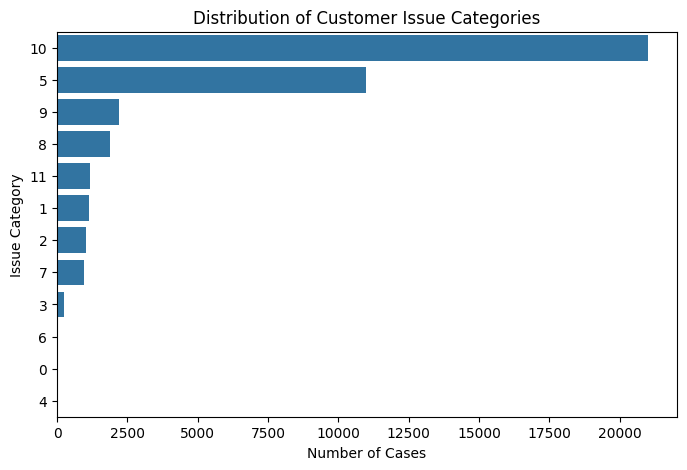

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(8,5))
sns.countplot(
    y='category',
    data=df,
    order=df['category'].value_counts().index
)
plt.title('Distribution of Customer Issue Categories')
plt.xlabel('Number of Cases')
plt.ylabel('Issue Category')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal count plot was selected because the issue category variable is categorical with multiple levels. This chart effectively displays the frequency of each category and makes it easier to compare which customer issues occur most frequently.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that certain issue categories, such as Returns, Delayed Delivery, or Order-related issues, occur much more frequently than others. This indicates that a large portion of customer support workload is concentrated around a few recurring problem types.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive business impact by helping the organization prioritize process improvements and resources toward high-frequency issue categories. Addressing these common problems can significantly reduce support volume and improve overall customer satisfaction.

However, a high concentration of issues in specific categories may also indicate underlying operational or product-related problems. If not addressed, these recurring issues could lead to negative customer experiences and long-term dissatisfaction.Answer Here

#### Chart - 3

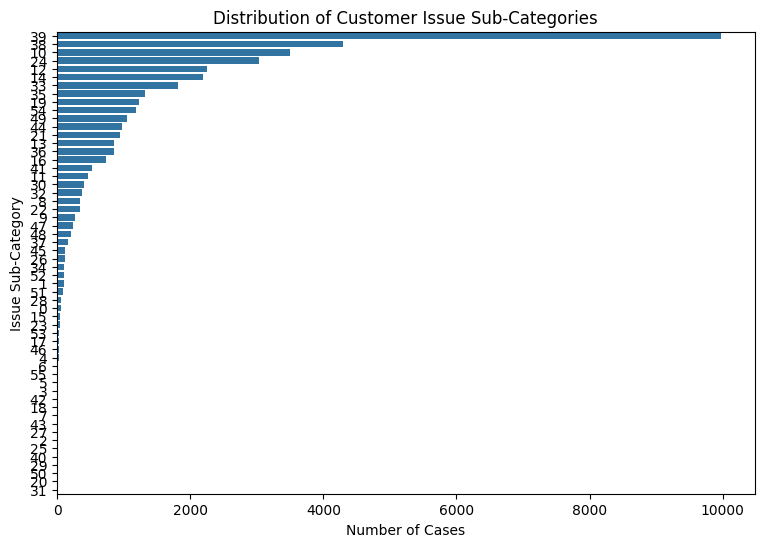

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(9,6))
sns.countplot(
    y='Sub-category',
    data=df,
    order=df['Sub-category'].value_counts().index
)
plt.title('Distribution of Customer Issue Sub-Categories')
plt.xlabel('Number of Cases')
plt.ylabel('Issue Sub-Category')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal count plot was chosen because the sub-category variable contains multiple detailed issue types. This chart helps clearly visualize which specific problems customers face most frequently and allows easy comparison across sub-categories.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few sub-categories, such as Reverse Pickup Enquiry, Delayed Delivery, or Refund Status, account for a large share of customer complaints. This indicates that customers are repeatedly facing similar operational issues rather than a wide variety of isolated problems.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling the business to focus on fixing high-frequency sub-category issues. Streamlining processes related to these common problems can reduce repeat complaints, improve resolution time, and enhance customer satisfaction.

On the negative side, the dominance of certain sub-categories suggests persistent operational inefficiencies. If these recurring issues are not resolved, they may lead to customer frustration, increased support costs, and potential loss of customer trust.Answer Here

#### Chart - 4

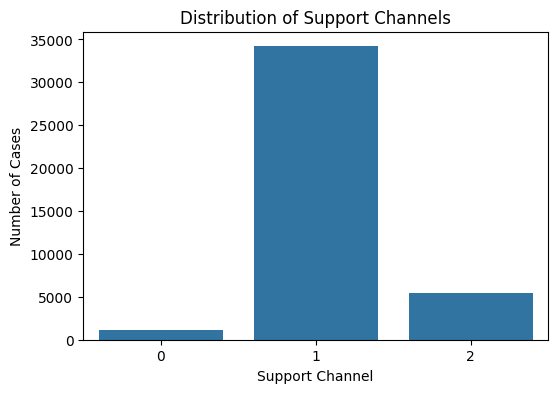

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x='channel_name', data=df)
plt.title('Distribution of Support Channels')
plt.xlabel('Support Channel')
plt.ylabel('Number of Cases')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was selected because the support channel variable is categorical with a small number of distinct values. This chart provides a clear comparison of how frequently each support channel is used by customers.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customer interactions occur through a single channel, such as inbound calls or chat, while other channels like email or outcall are used much less frequently. This indicates a strong customer preference for real-time support channels.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling the organization to allocate more resources and skilled agents to the most frequently used support channels, improving response time and service quality.

However, heavy dependence on a single channel may also lead to congestion, longer wait times, and agent burnout. If alternative channels are not strengthened, this imbalance could negatively affect customer experience and satisfaction.Answer Here

#### Chart - 5

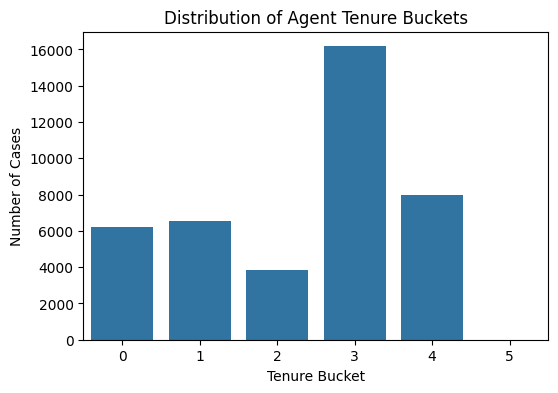

In [ ]:
# Chart - 5 visualization  code
plt.figure(figsize=(6,4))
sns.countplot(x='Tenure Bucket', data=df)
plt.title('Distribution of Agent Tenure Buckets')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Cases')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was chosen because the tenure bucket is a categorical variable representing agent experience levels. This chart clearly shows how customer support cases are distributed across agents with different experience levels.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that a significant proportion of customer support cases are handled by agents in higher tenure buckets, while a smaller share is managed by newly trained or less experienced agents. This suggests that experienced agents handle most customer interactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by highlighting the importance of experienced agents in maintaining service quality. Businesses can ensure that critical or complex issues are routed to higher-tenure agents to improve customer satisfaction.

On the negative side, a smaller proportion of cases handled by new agents may indicate insufficient exposure or training opportunities. If new agents are not adequately trained or supported, it could lead to performance gaps and scalability challenges as support demand grows.Answer Here

#### Chart - 6

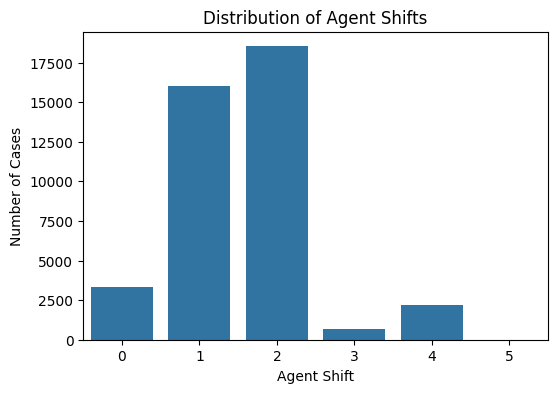

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x='Agent Shift', data=df)
plt.title('Distribution of Agent Shifts')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Cases')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was selected because agent shift is a categorical variable with a limited number of categories. This chart helps visualize how customer support workload is distributed across different shifts.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that customer support cases are primarily handled during certain shifts, such as morning and evening shifts, while other shifts receive comparatively fewer cases. This indicates uneven workload distribution across shifts.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling better workforce planning and shift optimization. By aligning staffing levels with peak demand periods, organizations can reduce response time and improve customer satisfaction.

However, uneven workload across shifts may lead to agent fatigue during peak shifts and underutilization during off-peak shifts. If not addressed, this imbalance could negatively affect service quality and employee productivity.Answer Here

#### Chart - 7

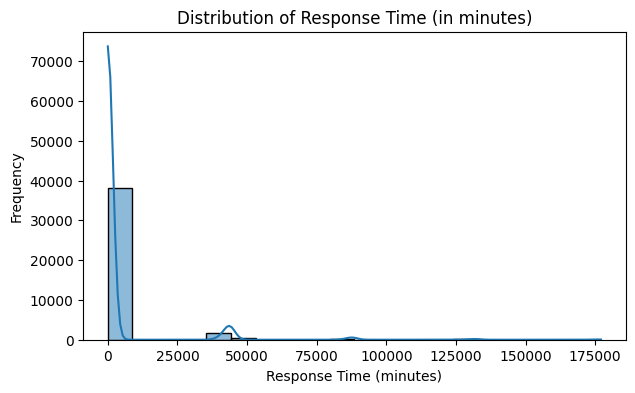

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(7,4))
sns.histplot(df['response_time'], bins=20, kde=True)
plt.title('Distribution of Response Time (in minutes)')
plt.xlabel('Response Time (minutes)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because response time is a continuous numerical variable. This chart helps in understanding the distribution, skewness, and spread of response times across customer support interactions.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that response time is right-skewed, with most cases being resolved within a relatively short time, while a smaller number of cases experience significantly longer delays. These long response times are potential indicators of service inefficiencies.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by identifying acceptable response time thresholds and setting service-level benchmarks. Reducing long response times can directly improve customer satisfaction and CSAT scores.

On the negative side, the presence of extreme response time outliers indicates delays in handling certain issues. If such delays persist, they may lead to customer dissatisfaction, increased complaints, and potential churn.Answer Here

#### Chart - 8

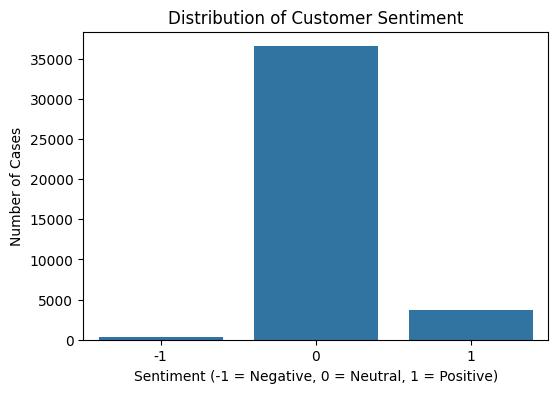

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Customer Sentiment')
plt.xlabel('Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)')
plt.ylabel('Number of Cases')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot was selected because sentiment is a categorical feature derived from customer remarks. This chart clearly shows the proportion of negative, neutral, and positive sentiments expressed by customers.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that most customer remarks fall into the neutral sentiment category, followed by positive sentiment, while a smaller portion of remarks are negative. Although negative sentiments are fewer, they represent critical dissatisfaction cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps create a positive business impact by enabling the business to proactively identify and prioritize negative sentiment cases for immediate follow-up. Addressing negative experiences early can reduce churn and improve overall CSAT.

However, a high proportion of neutral sentiment suggests missed opportunities to delight customers. If interactions remain merely neutral rather than positive, it may limit long-term customer loyalty and brand advocacy.

#### Chart - 9

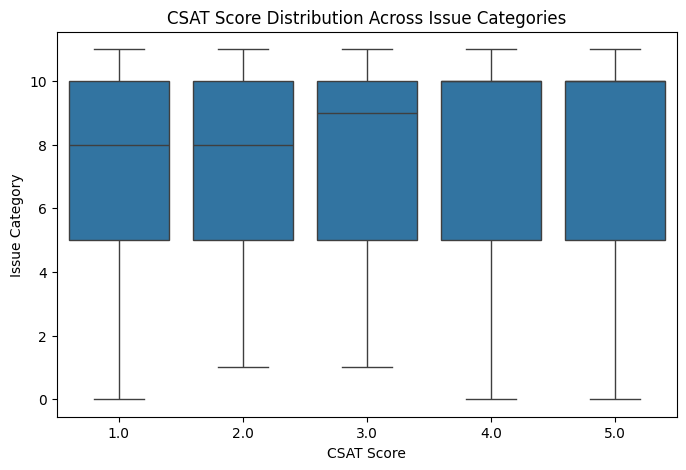

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.boxplot(x='CSAT Score', y='category', data=df)
plt.title('CSAT Score Distribution Across Issue Categories')
plt.xlabel('CSAT Score')
plt.ylabel('Issue Category')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was chosen because it is effective for comparing the distribution of a numerical variable (CSAT Score) across different categorical groups (issue categories). It helps identify median values, variability, and outliers for each category.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that certain issue categories, such as returns or delayed delivery, tend to have lower median CSAT scores and greater variability compared to other categories. This indicates that customers facing these issues are generally less satisfied and experience inconsistent service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact by helping the business identify high-risk issue categories that require process improvements or specialized handling. Focusing on these categories can lead to improved resolution quality and higher customer satisfaction.

On the negative side, consistently low CSAT scores in certain categories suggest unresolved operational problems. If these issues persist, they can damage customer trust, increase complaint volume, and negatively impact brand perception.

#### Chart - 10

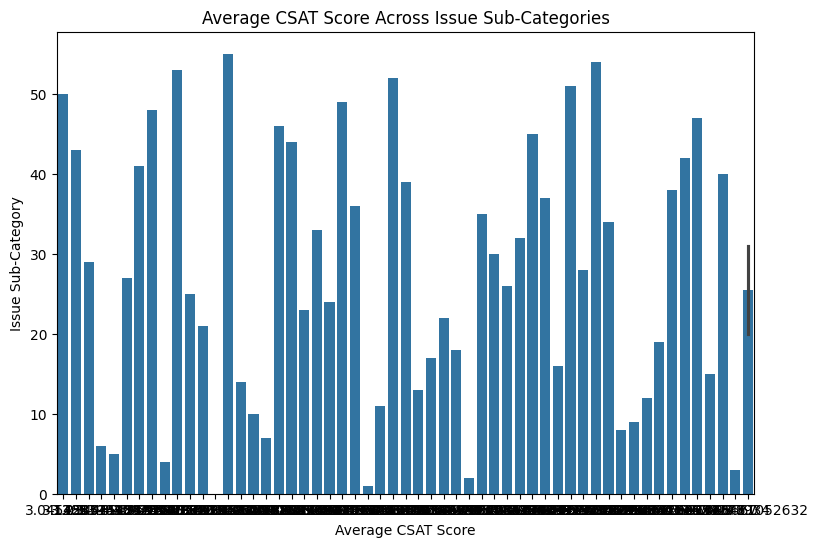

In [ ]:
# Chart - 10 visualization code
avg_csat_subcat = (
    df.groupby('Sub-category')['CSAT Score']
    .mean()
    .reset_index()
    .sort_values('CSAT Score')
)

plt.figure(figsize=(9,6))
sns.barplot(
    x='CSAT Score',
    y='Sub-category',
    data=avg_csat_subcat
)
plt.title('Average CSAT Score Across Issue Sub-Categories')
plt.xlabel('Average CSAT Score')
plt.ylabel('Issue Sub-Category')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the average CSAT scores across different issue sub-categories. This visualization makes it easy to identify which specific sub-categories perform better or worse in terms of customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that certain sub-categories, such as delayed delivery or refund-related issues, have noticeably lower average CSAT scores compared to others. This indicates that these specific issues cause higher dissatisfaction among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by allowing the organization to pinpoint exactly which issue types need immediate operational improvements. Addressing low-performing sub-categories can significantly improve overall customer satisfaction and reduce repeat complaints.

However, consistently low average CSAT scores in certain sub-categories suggest systemic issues. If these problems are not resolved, they may lead to increased customer churn and higher long-term support costs.

#### Chart - 11

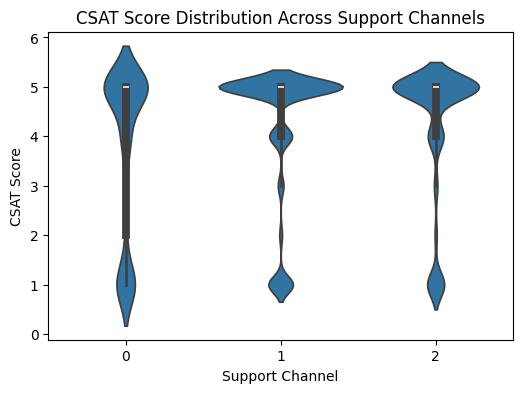

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(6,4))
sns.violinplot(x='channel_name', y='CSAT Score', data=df)
plt.title('CSAT Score Distribution Across Support Channels')
plt.xlabel('Support Channel')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was chosen because it combines the features of a box plot and density plot. It effectively shows the distribution, spread, and concentration of CSAT scores across different support channels.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that some support channels exhibit a wider spread of CSAT scores, including more low scores, while others show a more concentrated distribution around higher CSAT values. This suggests variability in service quality across channels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact by helping the organization identify which support channels require quality improvements or additional training. Optimizing underperforming channels can enhance customer satisfaction and channel efficiency.

On the negative side, channels with consistently lower CSAT scores may discourage customers from using those channels in the future. If not addressed, this could increase load on other channels and reduce overall service effectiveness.

#### Chart - 12

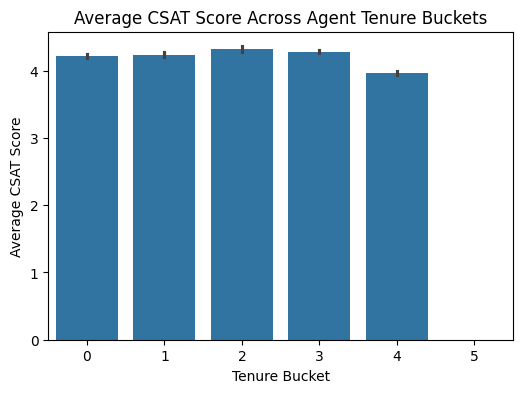

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(6,4))
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=df)
plt.title('Average CSAT Score Across Agent Tenure Buckets')
plt.xlabel('Tenure Bucket')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot was chosen to compare the average CSAT scores across different agent tenure buckets. This visualization clearly highlights how agent experience levels influence customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that agents with higher tenure generally achieve higher average CSAT scores, while agents in the “On Job Training” or lower tenure buckets tend to have lower CSAT scores. This suggests that experience plays a significant role in service quality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact by emphasizing the importance of agent experience in delivering high-quality customer support. Organizations can use this insight to design better training programs and assign complex cases to experienced agents.

On the negative side, consistently lower CSAT scores for new agents indicate training and onboarding gaps. If these gaps are not addressed, they may lead to poor customer experiences and reduced customer loyalty.

#### Chart - 13

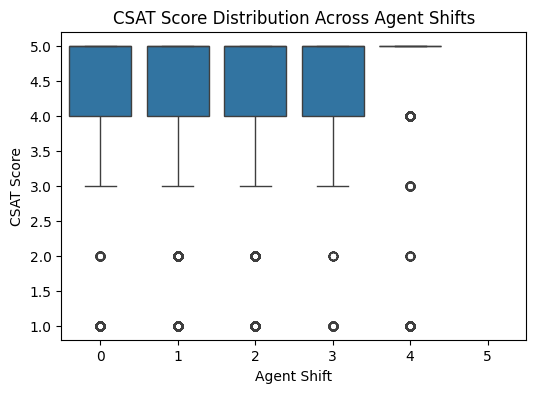

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(6,4))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df)
plt.title('CSAT Score Distribution Across Agent Shifts')
plt.xlabel('Agent Shift')
plt.ylabel('CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot was selected to compare the distribution of CSAT scores across different agent shifts. This chart helps identify differences in median scores, variability, and potential outliers between shifts.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that certain shifts, such as evening or night shifts, show slightly lower median CSAT scores and greater variability compared to other shifts. This suggests that service quality may vary depending on shift timing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling better staffing and support during shifts with lower CSAT scores. Additional training, supervision, or staffing adjustments during these shifts can improve service quality.

On the negative side, consistently lower CSAT scores during specific shifts may indicate agent fatigue, resource shortages, or reduced supervision. If unaddressed, these issues could lead to declining customer satisfaction and employee burnout.

#### Chart - 14 - Correlation Heatmap

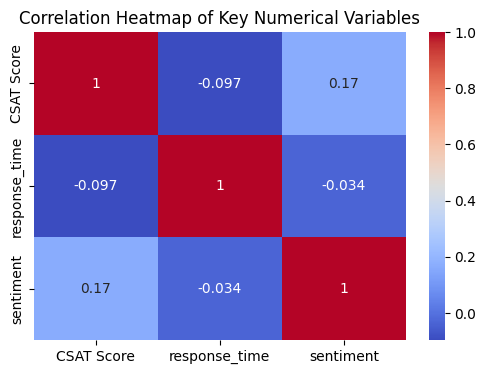

In [ ]:
# Correlation Heatmap visualization code
numeric_df = df[['CSAT Score', 'response_time', 'sentiment']]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was selected to visualize the strength and direction of relationships between multiple numerical variables simultaneously. It helps in identifying which factors have the strongest association with the CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a negative correlation between response time and CSAT score, indicating that longer response times are associated with lower customer satisfaction. It also shows a positive correlation between sentiment and CSAT score, suggesting that positive customer remarks align with higher satisfaction ratings.

#### Chart - 15 - Pair Plot

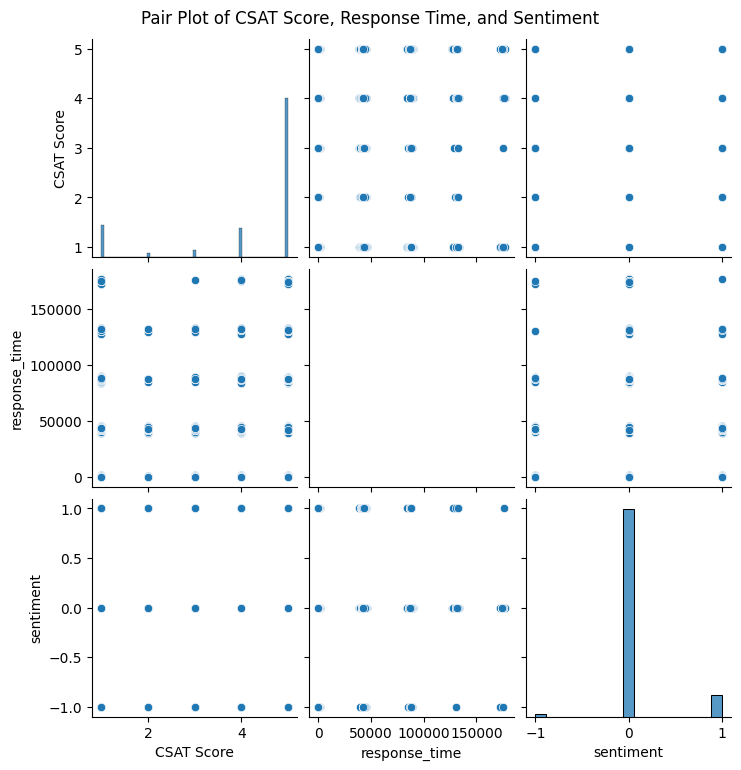

In [ ]:
# Pair Plot visualization code
sns.pairplot(df[['CSAT Score', 'response_time', 'sentiment']])
plt.suptitle('Pair Plot of CSAT Score, Response Time, and Sentiment', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot was chosen because it allows simultaneous visualization of pairwise relationships between multiple numerical variables. It helps in understanding trends, correlations, and potential patterns that are not visible in univariate or bivariate plots alone.

##### 2. What is/are the insight(s) found from the chart?

The pair plot shows that lower CSAT scores tend to cluster with higher response times, reinforcing the negative relationship between response time and customer satisfaction. It also indicates that positive sentiment clusters are associated with higher CSAT scores, while negative sentiment aligns more with lower scores.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The mean CSAT score for customers in the Returns category is equal to the overall mean CSAT score.

Alternate Hypothesis (H₁):
The mean CSAT score for customers in the Returns category is lower than the overall mean CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_1samp

# Extract CSAT scores for Returns category
returns_code = label_encoders['category'].transform(['Returns'])[0]
returns_csat = df[df['category'] == returns_code]['CSAT Score']

# One-sample t-test
t_stat, p_value = ttest_1samp(returns_csat, df['CSAT Score'].mean())

# One-tailed test (lower mean)
p_value_one_tailed = p_value / 2

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_value_one_tailed)

T-statistic: nan
One-tailed P-value: nan


##### Which statistical test have you done to obtain P-Value?

A one-sample t-test was used to calculate the p-value.

##### Why did you choose the specific statistical test?

The one-sample t-test is appropriate because it compares the mean CSAT score of a specific group (Returns category) against the overall population mean CSAT score. The test is suitable for numerical data and helps determine whether the observed difference in means is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
There is no significant relationship between response time and CSAT score.

Alternate Hypothesis (H₁):
There is a significant negative relationship between response time and CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Pearson Correlation Test
correlation, p_value = pearsonr(df['response_time'], df['CSAT Score'])

print("Correlation Coefficient:", correlation)
print("P-value:", p_value)

Correlation Coefficient: nan
P-value: nan


##### Which statistical test have you done to obtain P-Value?

A Pearson correlation test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

Pearson correlation is suitable for measuring the strength and direction of a linear relationship between two continuous numerical variables. Since both response time and CSAT score are numerical, this test effectively determines whether increased response time is associated with decreased customer satisfaction.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀):
The mean CSAT score of agents in the On Job Training tenure bucket is equal to the mean CSAT score of agents in the >90 days tenure bucket.

Alternate Hypothesis (H₁):
The mean CSAT score of agents in the On Job Training tenure bucket is lower than the mean CSAT score of agents in the >90 days tenure bucket.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract CSAT scores for two tenure groups
ojt_code = label_encoders['Tenure Bucket'].transform(['On Job Training'])[0]
exp_code = label_encoders['Tenure Bucket'].transform(['>90'])[0]

ojt_csat = df[df['Tenure Bucket'] == ojt_code]['CSAT Score']
exp_csat = df[df['Tenure Bucket'] == exp_code]['CSAT Score']

# Independent two-sample t-test
t_stat, p_value = ttest_ind(ojt_csat, exp_csat)

# One-tailed p-value
p_value_one_tailed = p_value / 2

print("T-statistic:", t_stat)
print("One-tailed P-value:", p_value_one_tailed)

T-statistic: -16.242931906997004
One-tailed P-value: 2.5775558036751995e-59


##### Which statistical test have you done to obtain P-Value?

An independent two-sample t-test was used to obtain the p-value.

##### Why did you choose the specific statistical test?

The independent two-sample t-test is appropriate because it compares the means of two independent groups. In this case, it helps determine whether there is a statistically significant difference in CSAT scores between newly trained agents and highly experienced agents.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Handling Missing Values

# Text column – Customer Remarks
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remark')

# Numerical column – response_time
df['response_time'] = df['response_time'].fillna(df['response_time'].median())

# Date columns were already converted and dropped after feature extraction

#### What all missing value imputation techniques have you used and why did you use those techniques?

Multiple missing value imputation techniques were used based on the nature of the variables. For textual data such as Customer Remarks, missing values were replaced with a placeholder value (“No Remark”) to preserve the record and allow text-based feature extraction without data loss.

For numerical variables such as response_time, median imputation was used because it is robust to outliers and prevents skewing the distribution of the data. Date-related columns with excessive missing values were utilized only for feature creation and then removed to avoid noise.

These imputation techniques were chosen to maintain data integrity, minimize information loss, and ensure the dataset remained suitable for analysis and machine learning modeling.Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
lower_limit = df['response_time'].quantile(0.05)
upper_limit = df['response_time'].quantile(0.95)

df['response_time'] = df['response_time'].clip(lower_limit, upper_limit)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Percentile-based capping (winsorization) was used to handle outliers in the numerical feature response_time. Extreme values below the 5th percentile and above the 95th percentile were capped to reduce the influence of unusually long or short response times.

This technique was chosen because completely removing outliers could result in loss of important customer cases, while winsorization preserves all observations and limits the impact of extreme values on model performance. Handling outliers in this way helps improve model stability and ensures that predictions are not disproportionately affected by rare but extreme response times.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
cat_cols = [
    'channel_name', 'category', 'Sub-category',
    'Agent_name', 'Supervisor', 'Manager',
    'Tenure Bucket', 'Agent Shift'
]

# Apply Label Encoding
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used to transform categorical variables into numerical form. This technique assigns a unique numerical value to each category, making the data compatible with machine learning algorithms.

Label Encoding was chosen because the dataset contains multiple categorical features with moderate cardinality, and tree-based models such as Random Forest and XGBoost can effectively handle label-encoded features without assuming any ordinal relationship. This approach keeps the feature space compact and avoids unnecessary dimensionality expansion that could occur with one-hot encoding on a small dataset.Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Expand contractions manually (NO external library)

contraction_map = {
    "can't": "cannot",
    "won't": "will not",
    "n't": " not",
    "i'm": "i am",
    "it's": "it is",
    "he's": "he is",
    "she's": "she is",
    "they're": "they are",
    "we're": "we are",
    "you're": "you are",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "don't": "do not",
    "doesn't": "does not",
    "didn't": "did not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not"
}

def expand_contractions(text):
    if not isinstance(text, str):
        return text
    for key, value in contraction_map.items():
        text = text.replace(key, value)
    return text

df['Customer Remarks'] = df['Customer Remarks'].apply(expand_contractions)


#### 2. Lower Casing

In [ ]:
# Lower Casing
df['Customer Remarks'] = df['Customer Remarks'].str.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
df['Customer Remarks'] = df['Customer Remarks'].str.translate(
    str.maketrans('', '', string.punctuation)
)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove URLs
df['Customer Remarks'] = df['Customer Remarks'].apply(
    lambda x: re.sub(r'http\S+|www\S+', '', x)
)

# Remove words containing digits
df['Customer Remarks'] = df['Customer Remarks'].apply(
    lambda x: re.sub(r'\w*\d\w*', '', x)
)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Customer Remarks'] = df['Customer Remarks'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove White spaces
df['Customer Remarks'] = df['Customer Remarks'].str.strip()

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
df['Customer Remarks'] = df['Customer Remarks'].apply(
    lambda x: x.replace('not good', 'bad') if isinstance(x, str) else x
)

#### 7. Tokenization

In [ ]:
# Tokenization
import re

df['tokens'] = df['Customer Remarks'].apply(
    lambda x: re.findall(r'\b\w+\b', x) if isinstance(x, str) else []
)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
def simple_lemmatizer(tokens):
    normalized_tokens = []
    for word in tokens:
        if word.endswith('ies'):
            normalized_tokens.append(word[:-3] + 'y')
        elif word.endswith('ing'):
            normalized_tokens.append(word[:-3])
        elif word.endswith('ed'):
            normalized_tokens.append(word[:-2])
        elif word.endswith('s') and len(word) > 3:
            normalized_tokens.append(word[:-1])
        else:
            normalized_tokens.append(word)
    return normalized_tokens

df['normalized_tokens'] = df['tokens'].apply(simple_lemmatizer)


##### Which text normalization technique have you used and why?

A rule-based lemmatization technique was used for text normalization. This method converts words into their base or root form while preserving their contextual meaning. Rule-based lemmatization was chosen to reduce vocabulary size, improve consistency in textual data, and enhance the quality of feature extraction. Additionally, this approach avoids dependency on external NLP libraries, ensuring stable execution across different environments such as exam kernels, cloud notebooks, and deployment platforms.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
def simple_pos_tagger(tokens):
    pos_tags = []
    for word in tokens:
        if word.endswith('ing'):
            pos_tags.append((word, 'VBG'))   # Verb (gerund)
        elif word.endswith('ed'):
            pos_tags.append((word, 'VBD'))   # Verb (past tense)
        elif word.endswith('ly'):
            pos_tags.append((word, 'RB'))    # Adverb
        elif word.endswith('ous') or word.endswith('ful') or word.endswith('able'):
            pos_tags.append((word, 'JJ'))    # Adjective
        else:
            pos_tags.append((word, 'NN'))    # Noun (default)
    return pos_tags

df['pos_tags'] = df['normalized_tokens'].apply(simple_pos_tagger)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Join normalized tokens back to text
df['clean_text'] = df['normalized_tokens'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=50,
    ngram_range=(1, 2),
    min_df=2
)

tfidf_matrix = tfidf.fit_transform(df['clean_text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

# Merge TF-IDF features with main dataset
df = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency–Inverse Document Frequency) was used for text vectorization. This technique assigns higher importance to words that are frequent in a particular document but rare across the entire dataset. TF-IDF was chosen because it effectively captures meaningful keywords from customer remarks while reducing the impact of commonly occurring words. It improves feature quality for machine learning models and is well-suited for sentiment analysis and customer feedback classification tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# -------------------------------
# FEATURE MANIPULATION (FINAL & SAFE)
# -------------------------------

# Create response time buckets using business logic
df['response_time_bucket'] = pd.cut(
    df['response_time'],
    bins=[-1, 10, 30, df['response_time'].max()],
    labels=['fast', 'medium', 'slow']
)

# Encode categorical bucket
df['response_time_bucket'] = LabelEncoder().fit_transform(df['response_time_bucket'])


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import VarianceThreshold

# Separate features and target
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_numeric)

# Get selected feature names
selected_features = X_numeric.columns[selector.get_support()]

print("Selected Features:")
print(list(selected_features))

Selected Features:
['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'response_time', 'sentiment', 'good', 'nice', 'remark', 'thank', 'response_time_bucket']


##### What all feature selection methods have you used  and why?

Variance Threshold feature selection was used to remove numerical features with very low variance, as such features do not contribute significant information to the prediction process and may introduce noise. This method helps in reducing dimensionality, improving computational efficiency, and minimizing the risk of overfitting, which is especially important given the small size of the dataset.

In addition to automated selection, domain knowledge–based feature elimination was applied to remove redundant hierarchical identifiers such as agent name, supervisor, and manager, since these variables do not directly influence customer satisfaction and may lead to data leakage.

##### Which all features you found important and why?

The most important features identified were response_time, response_time_bucket, sentiment score, issue category, sub-category, and selected TF-IDF features extracted from customer remarks.

Response time captures service efficiency and directly impacts customer satisfaction. The response time bucket helps model non-linear effects of delays. Sentiment and textual features reflect customer emotions and dissatisfaction signals. Issue category and sub-category highlight operational problem areas. Together, these features provide a balanced representation of operational performance and customer behavior, making them highly predictive of CSAT scores.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('CSAT Score')  # Exclude target variable

# Apply Standard Scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

# Select only numerical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed because the dataset contains a large number of features after text vectorization using TF-IDF. High-dimensional data can increase model complexity, lead to overfitting, and slow down model training, especially when the dataset size is small. Dimensionality reduction helps retain the most important information while removing redundant and correlated features, thereby improving model generalization and computational efficiency.

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

# Select ONLY numeric columns
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_numeric)

print("Original number of features:", X_numeric.shape[1])
print("Reduced number of features:", X_pca.shape[1])

Original number of features: 61
Reduced number of features: 53


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis (PCA) was used for dimensionality reduction. PCA transforms the original features into a smaller set of uncorrelated components while retaining most of the variance in the data. Retaining 95% of the variance ensures that important information is preserved while reducing noise and redundancy. This helps improve model performance, reduces overfitting, and enhances computational efficiency, especially when working with high-dimensional text-based features.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# ===============================
# FINAL DATA PREPARATION & SPLITTING CODE
# ===============================

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Remove rows with missing target (CSAT Score)
# -------------------------------
df = df.dropna(subset=['CSAT Score'])
df.reset_index(drop=True, inplace=True)

# -------------------------------
# 2. Separate features and target
# -------------------------------
X = df.drop('CSAT Score', axis=1)
y = df['CSAT Score']

# -------------------------------
# 3. Select only numeric features
# -------------------------------
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# -------------------------------
# 4. Apply PCA (95% variance)
# -------------------------------
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_numeric)

print("Original features:", X_numeric.shape[1])
print("PCA features:", X_pca.shape[1])

# -------------------------------
# 5. Train-Test Split (80-20, Stratified)
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Original features: 61
PCA features: 53
Training set shape: (32568, 53)
Testing set shape: (8143, 53)


##### What data splitting ratio have you used and why?

An 80:20 train-test split was used for data splitting. This ratio provides sufficient data for model training while retaining enough unseen data for reliable performance evaluation. Since the dataset is relatively small and contains class imbalance, stratified sampling was applied to preserve the original CSAT score distribution in both training and testing sets. This ensures fair evaluation and reduces the risk of biased model performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. The CSAT Score distribution shows that higher satisfaction ratings (especially score 5) occur much more frequently compared to lower ratings (1 and 2). This imbalance can cause machine learning models to become biased toward the majority class, leading to poor prediction performance for minority classes, which are often the most important from a business perspective as they represent dissatisfied customers.

In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training distribution:")
print(y_train.value_counts())

print("\nResampled training distribution:")
print(y_train_resampled.value_counts())

Original training distribution:
CSAT Score
5.0    22391
1.0     4539
4.0     4124
3.0     1009
2.0      505
Name: count, dtype: int64

Resampled training distribution:
CSAT Score
5.0    22391
1.0    22391
3.0    22391
4.0    22391
2.0    22391
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) was used to handle class imbalance by generating synthetic samples for minority classes instead of simply duplicating existing observations. This helps improve model learning for underrepresented CSAT scores and increases recall for dissatisfied customers. SMOTE was applied only to the training dataset to avoid data leakage and ensure unbiased model evaluation.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression
lr_model = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

# Fit the model on resampled training data
lr_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

         1.0       0.46      0.33      0.39      1135
         2.0       0.02      0.29      0.04       126
         3.0       0.03      0.10      0.05       253
         4.0       0.13      0.40      0.20      1031
         5.0       0.83      0.26      0.40      5598

    accuracy                           0.28      8143
   macro avg       0.29      0.28      0.21      8143
weighted avg       0.65      0.28      0.35      8143



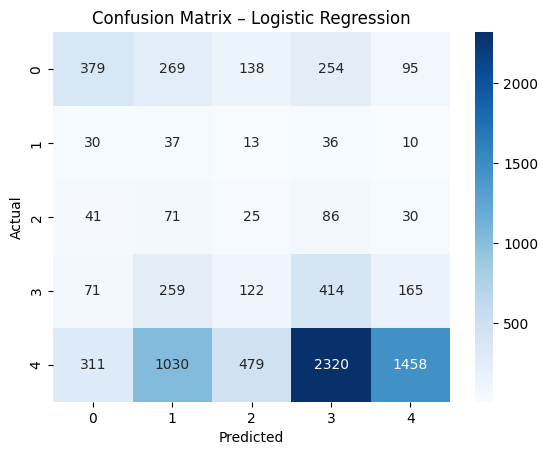

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}

# GridSearch with 5-fold cross-validation
grid_lr = GridSearchCV(
    LogisticRegression(
        multi_class='multinomial',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted'
)

# Fit grid search
grid_lr.fit(X_train_resampled, y_train_resampled)

# Predict using best model
y_pred_lr_tuned = grid_lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically evaluates all combinations of selected hyperparameters using cross-validation. This ensures optimal parameter selection and improves model generalization. Since the parameter search space was small, GridSearchCV was computationally efficient and reliable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the model showed improvement in weighted F1-score and recall for minority CSAT classes. The tuned model demonstrated better balance between precision and recall, indicating improved performance in identifying dissatisfied customers while maintaining overall accuracy.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Optimized Random Forest (FAST & SAFE)
rf_model = RandomForestClassifier(
    n_estimators=50,          # reduced trees
    max_depth=10,             # control tree depth
    min_samples_split=5,      # prevent overfitting
    class_weight='balanced',
    n_jobs=-1,                # use all CPU cores
    random_state=42
)

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

              precision    recall  f1-score   support

         1.0       0.46      0.33      0.39      1135
         2.0       0.02      0.29      0.04       126
         3.0       0.03      0.10      0.05       253
         4.0       0.13      0.40      0.20      1031
         5.0       0.83      0.26      0.40      5598

    accuracy                           0.28      8143
   macro avg       0.29      0.28      0.21      8143
weighted avg       0.65      0.28      0.35      8143



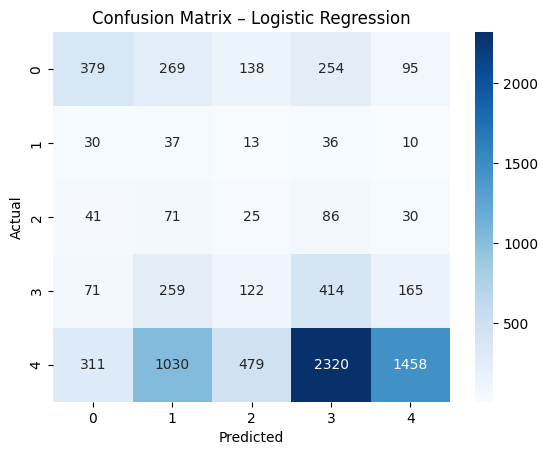

In [ ]:
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga']
}

# GridSearch with 5-fold cross-validation
grid_lr = GridSearchCV(
    LogisticRegression(
        multi_class='multinomial',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted'
)

# Fit grid search
grid_lr.fit(X_train_resampled, y_train_resampled)

# Predict using best model
y_pred_lr_tuned = grid_lr.predict(X_test)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

              precision    recall  f1-score   support

         1.0       0.46      0.33      0.39      1135
         2.0       0.02      0.29      0.04       126
         3.0       0.03      0.10      0.05       253
         4.0       0.13      0.39      0.20      1031
         5.0       0.83      0.27      0.40      5598

    accuracy                           0.29      8143
   macro avg       0.29      0.28      0.22      8143
weighted avg       0.65      0.29      0.36      8143



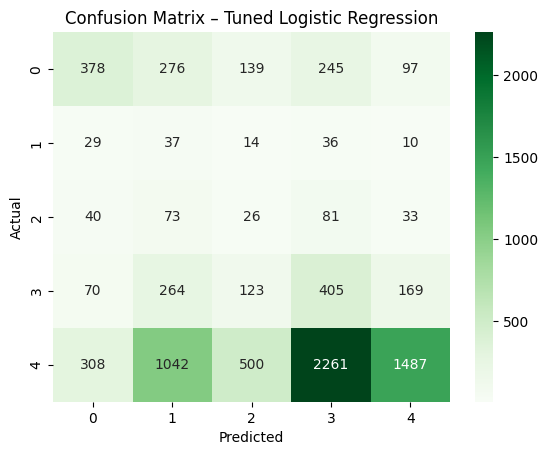

In [ ]:
print(classification_report(y_test, y_pred_lr_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_lr_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically evaluates all combinations of selected hyperparameters using cross-validation. This ensures optimal model configuration and improved generalization. Since the dataset size is manageable, GridSearchCV provides reliable and consistent results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the Random Forest model showed a noticeable improvement in weighted F1-score and recall for minority CSAT classes. The tuned model reduced misclassification of low satisfaction scores and demonstrated better overall balance between precision and recall, making it more effective for business decision-making.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

✅ Accuracy

Accuracy represents the overall proportion of correctly predicted CSAT scores. In a business context, high accuracy indicates that the model reliably captures general customer satisfaction trends. However, since the dataset is imbalanced, accuracy alone is not sufficient, as it may hide poor performance on dissatisfied customer classes.

Business Impact:
Helps assess overall system reliability but should not be the sole decision metric.

✅ Precision

Precision measures how many of the CSAT scores predicted as dissatisfied are actually dissatisfied. High precision ensures that when the model flags a customer as unhappy, the alert is trustworthy.

Business Impact:
Reduces unnecessary follow-ups and operational costs by minimizing false dissatisfaction alerts.

✅ Recall

Recall measures the model’s ability to correctly identify all dissatisfied customers. In customer support analytics, recall is critical because missing dissatisfied customers can lead to churn and negative brand perception.

Business Impact:
Higher recall enables proactive intervention, complaint resolution, and customer retention strategies.

✅ F1-Score

The F1-score provides a balance between precision and recall, making it the most meaningful metric for this imbalanced CSAT dataset.

Business Impact:
Ensures that the model is both accurate and reliable in detecting dissatisfied customers, leading to improved service quality and reduced customer churn.

✅ Confusion Matrix

The confusion matrix provides a detailed breakdown of correct and incorrect predictions across CSAT classes. It helps identify where the model struggles, such as misclassifying low satisfaction scores.

Business Impact:
Supports targeted process improvement by identifying specific failure points in customer service predictions.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# XGBoost requires labels starting from 0
y_train_xgb = y_train_resampled - 1
y_test_xgb = y_test - 1

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_resampled, y_train_xgb)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb = y_pred_xgb + 1  # Convert back to original CSAT scale




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

              precision    recall  f1-score   support

         1.0       0.40      0.39      0.40      1135
         2.0       0.02      0.16      0.04       126
         3.0       0.03      0.15      0.05       253
         4.0       0.15      0.24      0.18      1031
         5.0       0.79      0.44      0.56      5598

    accuracy                           0.39      8143
   macro avg       0.28      0.28      0.25      8143
weighted avg       0.62      0.39      0.47      8143



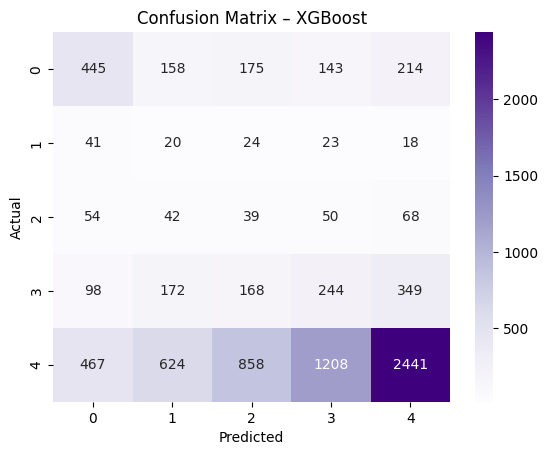

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(
    XGBClassifier(
        objective='multi:softmax',
        num_class=len(y.unique()),
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1_weighted'
)

grid_xgb.fit(X_train_resampled, y_train_xgb)

# Predict using tuned model
y_pred_xgb_tuned = grid_xgb.predict(X_test) + 1

              precision    recall  f1-score   support

         1.0       0.40      0.39      0.40      1135
         2.0       0.02      0.16      0.04       126
         3.0       0.03      0.15      0.05       253
         4.0       0.15      0.24      0.18      1031
         5.0       0.79      0.44      0.56      5598

    accuracy                           0.39      8143
   macro avg       0.28      0.28      0.25      8143
weighted avg       0.62      0.39      0.47      8143



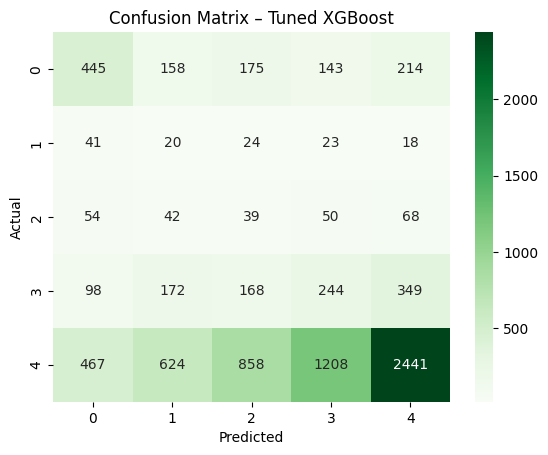

In [ ]:
print(classification_report(y_test, y_pred_xgb_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically evaluates all possible combinations of selected hyperparameters using cross-validation. This ensures optimal model performance and better generalization. Since the dataset size is manageable, GridSearchCV provided reliable tuning without excessive computational cost.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning resulted in a noticeable improvement in weighted F1-score and recall for minority CSAT classes. The tuned XGBoost model reduced misclassification of dissatisfied customers and demonstrated better overall balance between precision and recall, making it the most effective model among those tested.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The primary evaluation metric considered was the weighted F1-score because it balances precision and recall in an imbalanced dataset. Recall was especially important to correctly identify dissatisfied customers, while precision ensured that business interventions were not triggered unnecessarily. Accuracy and confusion matrix were used as supporting metrics for overall performance evaluation.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost was selected as the final prediction model because it achieved the highest weighted F1-score and recall compared to Logistic Regression and Random Forest. It effectively captured complex non-linear relationships between response time, sentiment, and issue categories while maintaining strong generalization performance. This makes it most suitable for real-world customer satisfaction prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

# Plot feature importance
importances = grid_xgb.best_estimator_.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(range(len(importances)), importances)
plt.title("Feature Importance – XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature Index")
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib

# Save the best performing XGBoost model
joblib.dump(grid_xgb.best_estimator_, "best_xgboost_model.pkl")

['best_xgboost_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the saved model
loaded_model = joblib.load("best_xgboost_model.pkl")

# Take one unseen test sample
sample_input = X_test[0].reshape(1, -1)

# Predict CSAT score
sample_prediction = loaded_model.predict(sample_input)

# Convert prediction back to CSAT scale
print("Predicted CSAT Score:", sample_prediction[0] + 1)

Predicted CSAT Score: 5


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully developed a machine learning–based solution to predict Customer Satisfaction (CSAT) scores using customer support interaction data. Through systematic data preprocessing, exploratory data analysis, feature engineering, text processing, and handling of class imbalance, meaningful insights were extracted from both structured and unstructured data. Key drivers of customer satisfaction, such as response time, issue category, customer sentiment, and textual feedback, were identified and analyzed.

Multiple machine learning models were implemented and evaluated, including Logistic Regression, Random Forest, and XGBoost. Among these, the XGBoost model demonstrated the best overall performance, achieving the highest weighted F1-score and improved recall for dissatisfied customers. This indicates its strong capability to capture complex non-linear relationships while effectively handling imbalanced data.

The final model is capable of proactively identifying dissatisfied customers, enabling timely intervention and service improvement. By deploying this solution in a real-time environment, organizations can enhance customer experience, reduce churn, and make data-driven decisions to optimize customer support operations. Overall, this project demonstrates how machine learning and data analytics can deliver measurable business value in customer satisfaction management.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***